In [1]:
import numpy as np
import pandas as pd
import datatable
import itertools as it
from owlready2 import *
import math
import joblib

import pickle
from sklearn.utils import parallel_backend

#para depurar los que letras que no están en el codigo ascii
import unicodedata
import functools
import spacy
import stanfordnlp
#from spacy_stanfordnlp import StanfordNLPLanguage
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import metrics
#from wiki_dump_reader import Cleaner, iterate
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,scale

#from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
#from gensim.corpora import Dictionary

#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG

import random
from sklearn.externals import joblib


#Operaciones con gráficos
import scattertext as st
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

import networkx as nx

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool, LabelSet, ColumnDataSource, Range1d
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE

#import gensim
#import gensim.corpora as corpora
#from gensim.models import CoherenceModel
#from gensim.models import HdpModel

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from multiprocessing import  Pool
import math
import scipy.sparse as sp
from bayes_opt import BayesianOptimization

import vectorizer
import vectorizer 
importlib.reload(vectorizer)
from vectorizer import  WeightedTfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import  h2o

In [3]:
from h2o.estimators import H2OXGBoostEstimator, H2ODeepLearningEstimator,H2ORandomForestEstimator,H2OSupportVectorMachineEstimator

In [4]:

h2o.init(max_mem_size='14G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/rdelaguila/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1bfiucs5
  JVM stdout: /tmp/tmp1bfiucs5/h2o_rdelaguila_started_from_python.out
  JVM stderr: /tmp/tmp1bfiucs5/h2o_rdelaguila_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,7 months and 7 days !!!
H2O cluster name:,H2O_from_python_rdelaguila_r4cphj
H2O cluster total nodes:,1
H2O cluster free memory:,14 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [23]:
from hyperopt import fmin, tpe, hp,Trials

def xgb_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'max_depth': int(space['max_depth']), 'ntrees': int(space['ntrees']),'min_rows':int(space['min_rows']),'eta':float(space['eta']),
              'learn_rate':float(space['learn_rate']),'sample_rate':float(space['sample_rate']),
              'colsample_bytree':float(space['colsample_bytree']),'reg_lambda':float(space['reg_lambda']),'reg_alpha':float(space['reg_alpha'])}
      
    estimator = H2OXGBoostEstimator(**params,nfolds=2)
    estimator.train(x=vocab,y='target',training_frame=train)
    return estimator.logloss()

def optimize_xgb():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"max_depth": hp.uniform('max_depth',4, 40), "ntrees": hp.uniform('x_ntrees',50,400),'min_rows':hp.uniform('x_min_rows',2,50),'eta':hp.uniform('x_eta',0.01,1),
                 'learn_rate':hp.uniform('x_learn_rate',0.01,1),'sample_rate':hp.uniform('x_sample_rate',0.1,0.5),'colsample_bytree':hp.uniform('x_colsample_bytree',0.2,0.8),
                 'reg_lambda':hp.uniform('x_reg_lambda',0,1),'reg_alpha':hp.uniform('x_reg_alpha',0,1)}
    best = fmin(fn=xgb_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)
    


In [24]:
from hyperopt import fmin, tpe, hp,Trials

def svm_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'gamma': float(space['gamma'])}
      
    estimator = H2OSupportVectorMachineEstimator(**params,max_iterations=400)
    estimator.train(x=vocab,y='target',training_frame=train)
    return estimator.logloss()

def optimize_svm():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"gamma": hp.uniform('x_gamma',0,1)}
    best = fmin(fn=svm_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)

In [25]:
list((12,12))

[12, 12]

In [26]:
from hyperopt import fmin, tpe, hp,Trials

def rf_cv(space):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    params = {'max_depth': int(space['max_depth']), 
              'ntrees': int(space['ntrees']),'min_rows':int(space['min_rows']),
              'sample_rate':float(space['sample_rate'])}
      
    estimator = H2ORandomForestEstimator(**params,nfolds=2)
    estimator.train(x=vocab,y='target',training_frame=train,validation_frame=test)
    return estimator.logloss()

def optimize_rf():
    """Apply Bayesian Optimization to XGB parameters."""
    
    trials = Trials()
    space={"max_depth": hp.uniform('max_depth',4, 40), 
           "ntrees": hp.uniform('x_ntrees',50,400),
           'min_rows':hp.uniform('x_min_rows',2,50),
           'sample_rate':hp.uniform('x_sample_rate',0.1,0.5)}
    best = fmin(fn=rf_cv,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

    print("Final result:", best)

In [27]:
import joblib
vocab=joblib.load('../objects/reuters/vocab.dtm.final')
newdtm =joblib.load('../objects/reuters/newdtm.final')
corpusnormalizado = joblib.load('../data/processed/reuters/corpus_normalizado.final')
dtm = newdtm.todense()
dtm_scaled = scale(dtm)

In [28]:
dtm_scaled = pd.DataFrame(data=dtm_scaled, columns=vocab) ##revisar que está bien generado, si no ir al paso anterior

In [29]:
dtm_scaled['target']=corpusnormalizado.iloc[:,1]


In [30]:
dtm_scaled.head()

,55,result,52,loan,charge,50,credit,42,45,1985,...,department,cash,base,foreign,firm,country,day,raise,cut,target
0,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,0.988845,...,-0.198156,-0.225911,-0.233148,0.949376,2.258823,3.196858,0.914864,0.800901,0.82068,0
1,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,-0.270858,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0
2,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,-0.270858,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0
3,-0.142003,1.809473,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,3.281879,-0.270858,...,3.130651,-0.225911,-0.233148,-0.220074,-0.214203,1.463537,-0.215599,-0.211949,-0.20548,0
4,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,4.031615,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0


In [31]:
corpusnormalizado.head()

,texto_normalizado,new_target
0,asian exporter fear damage u.s.-japan rift mou...,0
1,china daily say vermin eat 7 12 pct grain stoc...,0
2,japan revise long term energy demand downwards...,0
3,thai trade deficit widen quarter thailand trad...,0
4,indonesia see cpo price rise sharply indonesia...,0


In [32]:
dtm_scaled.to_csv('../data/interim/reuters/weighteddtmscaled.csv')
dtm_scaled.head()

,55,result,52,loan,charge,50,credit,42,45,1985,...,department,cash,base,foreign,firm,country,day,raise,cut,target
0,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,0.988845,...,-0.198156,-0.225911,-0.233148,0.949376,2.258823,3.196858,0.914864,0.800901,0.82068,0
1,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,-0.270858,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0
2,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,-0.270858,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0
3,-0.142003,1.809473,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,3.281879,-0.270858,...,3.130651,-0.225911,-0.233148,-0.220074,-0.214203,1.463537,-0.215599,-0.211949,-0.20548,0
4,-0.142003,-0.261631,-0.139503,-0.18574,-0.153918,-0.260396,-0.182029,-0.147469,-0.167438,4.031615,...,-0.198156,-0.225911,-0.233148,-0.220074,-0.214203,-0.245386,-0.215599,-0.211949,-0.20548,0


In [33]:
frame = h2o.upload_file('../data/interim/reuters/weighteddtmscaled.csv',sep=',',header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
frame = frame.drop('C1')

In [35]:
frame['target']=frame['target'].asfactor()
train,test=frame.split_frame(ratios=[.75])

In [36]:

optimize_xgb()

xgboost Model Build progress: |                       
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [40]:
params= {'colsample_bytree': 0.31, 'eta': 0.68, 'learn_rate': 0.99, 'max_depth': 38, 'min_rows': 3, 'ntrees': 352, 'reg_alpha': 0.205, 'reg_lambda': 0.82, 'sample_rate': 0.5,"nfolds":10}

train

In [41]:
model = H2OXGBoostEstimator(**params,seed=123)

In [42]:
model.train(x=vocab,y='target',training_frame=train)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [43]:
performance = model.model_performance(test)

In [44]:
performance


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.022732118294635024
RMSE: 0.1507717423612098
LogLoss: 0.10727247053848477
Mean Per-Class Error: 0.1633059976943351

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,1906.0,7.0,6.0,0.006774,"13 / 1,919"
1,11.0,716.0,11.0,0.029810,22 / 738
2,17.0,17.0,41.0,0.453333,34 / 75
3,1934.0,740.0,58.0,0.025256,"69 / 2,732"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.974744
1,2,0.989751
2,3,1.000000


In [45]:
model.save_mojo('../objects/reuters/modelo_xgb_3class')


'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/reuters/modelo_xgb_3class/XGBoost_model_python_1594800800082_11390.zip'

In [46]:
optimize_rf()

drf Model Build progress: |                           
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [47]:
params = {'max_depth':30,'min_rows':7,'ntrees':191,'sample_rate':0.23,"nfolds":10}
rfmodel = H2ORandomForestEstimator(**params,seed=123)


In [48]:
rfmodel.train(x=vocab,y='target',training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
performance2 = rfmodel.model_performance(test)

In [50]:
performance2


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.03166304275191674
RMSE: 0.17794112158777897
LogLoss: 0.1223521673809554
Mean Per-Class Error: 0.34333953292633496

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,1916.0,3.0,0.0,0.001563,"3 / 1,919"
1,21.0,717.0,0.0,0.028455,21 / 738
2,54.0,21.0,0.0,1.000000,75 / 75
3,1991.0,741.0,0.0,0.036237,"99 / 2,732"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.963763
1,2,0.986091
2,3,1.000000


In [51]:
rfmodel.save_mojo('../objects/reuters/rf_model_3class')

'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/reuters/rf_model_3class/DRF_model_python_1594800800082_11401.zip'

## Corpus con target original

In [59]:
newdtm =joblib.load('../objects/reuters/newdtmsinoutliers.final')
corpusnormalizado = joblib.load('../data/processed/reuters/corpus_normalizado_sin_outliers.final')
dtm = newdtm.todense()
dtm_scaled = scale(dtm)

In [60]:
dtm_scaled = pd.DataFrame(data=dtm_scaled, columns=vocab) ##revisar que está bien generado, si no ir al paso anterior

In [61]:
corpusnormalizado.head()

,texto_normalizado,Topic
0,asian exporter fear damage u.s.-japan rift mount trade friction u....,0
1,china daily say vermin eat 7 12 pct grain stock survey 19 province...,0
2,japan revise long term energy demand downwards ministry internatio...,0
3,thai trade deficit widen quarter thailand trade deficit widen 4.5 ...,0
4,indonesia see cpo price rise sharply indonesia expect crude palm o...,0


In [62]:
dtm_scaled['target']=corpusnormalizado.iloc[:,1]

In [63]:
dtm_scaled.head()

,55,result,52,loan,charge,50,credit,42,45,1985,...,department,cash,base,foreign,firm,country,day,raise,cut,target
0,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,0.988852,...,-0.198156,-0.225908,-0.233144,0.949344,2.25900,3.196717,0.914849,0.800820,0.820581,0
1,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,-0.270861,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0
2,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,-0.270861,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0
3,-0.142004,1.809447,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,3.281798,-0.270861,...,3.130694,-0.225908,-0.233144,-0.220068,-0.21422,1.463473,-0.215596,-0.211924,-0.205457,0
4,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,4.031642,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0


In [64]:
corpusnormalizado.head()

,texto_normalizado,Topic
0,asian exporter fear damage u.s.-japan rift mount trade friction u....,0
1,china daily say vermin eat 7 12 pct grain stock survey 19 province...,0
2,japan revise long term energy demand downwards ministry internatio...,0
3,thai trade deficit widen quarter thailand trade deficit widen 4.5 ...,0
4,indonesia see cpo price rise sharply indonesia expect crude palm o...,0


In [65]:
dtm_scaled.to_csv('../data/interim/reuters/weighteddtmscaled.csv')
dtm_scaled.head()

,55,result,52,loan,charge,50,credit,42,45,1985,...,department,cash,base,foreign,firm,country,day,raise,cut,target
0,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,0.988852,...,-0.198156,-0.225908,-0.233144,0.949344,2.25900,3.196717,0.914849,0.800820,0.820581,0
1,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,-0.270861,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0
2,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,-0.270861,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0
3,-0.142004,1.809447,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,3.281798,-0.270861,...,3.130694,-0.225908,-0.233144,-0.220068,-0.21422,1.463473,-0.215596,-0.211924,-0.205457,0
4,-0.142004,-0.261627,-0.139498,-0.185747,-0.153916,-0.260418,-0.182037,-0.14746,-0.167435,4.031642,...,-0.198156,-0.225908,-0.233144,-0.220068,-0.21422,-0.245374,-0.215596,-0.211924,-0.205457,0


In [66]:
frame = h2o.upload_file('../data/interim/reuters/weighteddtmscaled.csv',sep=',',header=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
frame = frame.drop('C1')

In [68]:
frame['target']=frame['target'].asfactor()
train,test=frame.split_frame(ratios=[.75])

In [69]:
optimize_xgb()

xgboost Model Build progress: |                       
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [72]:
params= {'colsample_bytree': 0.70, 'eta': 0.41, 'learn_rate': 0.73, 'max_depth': 18, 'min_rows': 9, 'ntrees': 126, 'reg_alpha': 0.91, 'reg_lambda': 0.86, 'sample_rate': 0.3072,"nfolds":10}

train

In [73]:
model = H2OXGBoostEstimator(**params,seed=123)

In [74]:
model.train(x=vocab,y='target',training_frame=train)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [75]:
performance = model.model_performance(test)

In [76]:
performance


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.017114844569077456
RMSE: 0.1308237156217383
LogLoss: 0.0678986603764839
Mean Per-Class Error: 0.024402795014797363
AUC: 0.9932535930845249
AUCPR: 0.9116899442823632
Gini: 0.9865071861690498

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39588895440101624: 


,,0,1,Error,Rate
0,0,1857.0,20.0,0.0107,(20.0/1877.0)
1,1,33.0,832.0,0.0382,(33.0/865.0)
2,Total,1890.0,852.0,0.0193,(53.0/2742.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.395889,0.969132,136.0
1,max f2,0.260733,0.966290,154.0
2,max f0point5,0.914624,0.979047,94.0
3,max accuracy,0.436469,0.980671,131.0
4,max precision,0.999883,1.000000,0.0
5,max recall,0.000928,1.000000,390.0
6,max specificity,0.999883,1.000000,0.0
7,max absolute_mcc,0.395889,0.955122,136.0
8,max min_per_class_accuracy,0.201282,0.971098,169.0
9,max mean_per_class_accuracy,0.395889,0.975597,136.0



Gains/Lift Table: Avg response rate: 31.55 %, avg score: 31.46 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010212,0.999888,3.169942,3.169942,1.000000,0.999906,1.000000,0.999906,0.032370,0.032370,216.994220,216.994220
1,,2,0.020058,0.999862,3.169942,3.169942,1.000000,0.999874,1.000000,0.999890,0.031214,0.063584,216.994220,216.994220
2,,3,0.030270,0.999827,3.169942,3.169942,1.000000,0.999846,1.000000,0.999876,0.032370,0.095954,216.994220,216.994220
3,,4,0.040117,0.999783,3.169942,3.169942,1.000000,0.999809,1.000000,0.999859,0.031214,0.127168,216.994220,216.994220
4,,5,0.050328,0.999735,3.169942,3.169942,1.000000,0.999759,1.000000,0.999839,0.032370,0.159538,216.994220,216.994220
5,,6,0.100292,0.999475,3.169942,3.169942,1.000000,0.999611,1.000000,0.999725,0.158382,0.317919,216.994220,216.994220
6,,7,0.150255,0.998759,3.169942,3.169942,1.000000,0.999194,1.000000,0.999549,0.158382,0.476301,216.994220,216.994220
7,,8,0.200948,0.997491,3.169942,3.169942,1.000000,0.998111,1.000000,0.999186,0.160694,0.636994,216.994220,216.994220
8,,9,0.303428,0.688176,3.023290,3.120412,0.953737,0.950792,0.984375,0.982841,0.309827,0.946821,202.329007,212.041185
9,,10,0.400073,0.023415,0.430634,2.470648,0.135849,0.125333,0.779398,0.775695,0.041618,0.988439,-56.936634,147.064775


In [78]:
model.save_mojo('../objects/reuters/modelo_xgb_2class')


H2OServerError: HTTP 500 Server Error:
Server error water.api.FSIOException:
  Error: FS IO Failure: 
 accessed path : file:/mnt/c/Users/Raúl/Documents/Doctorado/curso%20NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts%20Phd/oboe/notebooks/../objects/reuters/modelo_xgb_2class/XGBoost_model_python_1594800800082_14811.zip msg: File already exists
  Request: None


In [79]:
optimize_rf()

drf Model Build progress: |                           
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█                                                     
█         

In [81]:
params = {'max_depth':28,'min_rows':9,'ntrees':211,'sample_rate':0.42,"nfolds":10}
rfmodel = H2ORandomForestEstimator(**params,seed=123)


In [82]:
rfmodel.train(x=vocab,y='target',training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [83]:
performance2 = rfmodel.model_performance(test)

In [84]:
performance2


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.01706769188296696
RMSE: 0.13064337672827872
LogLoss: 0.07262255584212055
Mean Per-Class Error: 0.019064673981664226
AUC: 0.9979650222806655
AUCPR: 0.9824720921035514
Gini: 0.995930044561331

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45786452104483166: 


,,0,1,Error,Rate
0,0,1870.0,7.0,0.0037,(7.0/1877.0)
1,1,36.0,829.0,0.0416,(36.0/865.0)
2,Total,1906.0,836.0,0.0157,(43.0/2742.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.457865,0.974721,176.0
1,max f2,0.224367,0.976893,225.0
2,max f0point5,0.457865,0.984794,176.0
3,max accuracy,0.457865,0.984318,176.0
4,max precision,0.999725,1.000000,0.0
5,max recall,0.036530,1.000000,332.0
6,max specificity,0.999725,1.000000,0.0
7,max absolute_mcc,0.457865,0.963653,176.0
8,max min_per_class_accuracy,0.284008,0.979222,210.0
9,max mean_per_class_accuracy,0.345437,0.980935,197.0



Gains/Lift Table: Avg response rate: 31.55 %, avg score: 31.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010212,0.998886,3.169942,3.169942,1.000000,0.999381,1.000000,0.999381,0.032370,0.032370,216.994220,216.994220
1,,2,0.020058,0.998092,3.169942,3.169942,1.000000,0.998540,1.000000,0.998968,0.031214,0.063584,216.994220,216.994220
2,,3,0.030270,0.997264,3.169942,3.169942,1.000000,0.997691,1.000000,0.998537,0.032370,0.095954,216.994220,216.994220
3,,4,0.040117,0.996531,3.169942,3.169942,1.000000,0.996797,1.000000,0.998110,0.031214,0.127168,216.994220,216.994220
4,,5,0.050328,0.995652,3.169942,3.169942,1.000000,0.996022,1.000000,0.997686,0.032370,0.159538,216.994220,216.994220
5,,6,0.100292,0.989865,3.169942,3.169942,1.000000,0.992999,1.000000,0.995351,0.158382,0.317919,216.994220,216.994220
6,,7,0.150255,0.980978,3.169942,3.169942,1.000000,0.985822,1.000000,0.992183,0.158382,0.476301,216.994220,216.994220
7,,8,0.200219,0.965049,3.169942,3.169942,1.000000,0.974564,1.000000,0.987786,0.158382,0.634682,216.994220,216.994220
8,,9,0.300146,0.485190,3.088958,3.142980,0.974453,0.837239,0.991495,0.937665,0.308671,0.943353,208.895827,214.298036
9,,10,0.400073,0.081890,0.509042,2.485096,0.160584,0.203327,0.783956,0.754248,0.050867,0.994220,-49.095819,148.509598


In [85]:
rfmodel.save_mojo('../objects/reuters/rf_model_2class')

'/mnt/c/Users/Raúl/Documents/Doctorado/curso NLP/FINAL-NLP-COURSE/FINAL_NLP_COURSE/Scripts Phd/oboe/objects/reuters/rf_model_2class/DRF_model_python_1594800800082_19643.zip'

In [7]:
xgbmodel = h2o.upload_mojo('../objects/reuters/modelo_xgb_2class/XGBoost_model_python_1594800800082_14811.zip')

generic Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OGenericEstimator :  Import MOJO Model
Model Key:  Generic_model_python_1599929472018_1


Model Summary: 


,,number_of_trees
0,,126.0




ModelMetricsBinomialGeneric: generic
** Reported on train data. **

MSE: 0.013905057158961169
RMSE: 0.11791970640635588
LogLoss: 0.05441726312857441
Mean Per-Class Error: 0.02032871106989531
AUC: 0.996469053920784
AUCPR: 0.848130524604588
Gini: 0.992938107841568

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5261646509170532: 


,,0,1,Error,Rate
0,0,5586.0,46.0,0.0082,(46.0/5632.0)
1,1,89.0,2325.0,0.0369,(89.0/2414.0)
2,Total,5675.0,2371.0,0.0168,(135.0/8046.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.526165,0.971787,161.0
1,max f2,0.249456,0.973035,218.0
2,max f0point5,0.784642,0.981563,113.0
3,max accuracy,0.526165,0.983221,161.0
4,max precision,0.999822,1.000000,0.0
5,max recall,0.003351,1.000000,385.0
6,max specificity,0.999822,1.000000,0.0
7,max absolute_mcc,0.526165,0.959927,161.0
8,max min_per_class_accuracy,0.244185,0.977983,220.0
9,max mean_per_class_accuracy,0.311531,0.979671,199.0



Gains/Lift Table: Avg response rate: 30.00 %, avg score: 30.19 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010191,0.999873,3.333057,3.333057,1.000000,0.999897,1.000000,0.999897,0.033969,0.033969,233.305717,233.305717
1,,2,0.020134,0.999835,3.333057,3.333057,1.000000,0.999855,1.000000,0.999876,0.033140,0.067109,233.305717,233.305717
2,,3,0.030201,0.999791,3.333057,3.333057,1.000000,0.999814,1.000000,0.999855,0.033554,0.100663,233.305717,233.305717
3,,4,0.040020,0.999744,3.333057,3.333057,1.000000,0.999770,1.000000,0.999834,0.032726,0.133389,233.305717,233.305717
4,,5,0.050087,0.999697,3.333057,3.333057,1.000000,0.999721,1.000000,0.999812,0.033554,0.166943,233.305717,233.305717
5,,6,0.100298,0.999413,3.333057,3.333057,1.000000,0.999563,1.000000,0.999687,0.167357,0.334300,233.305717,233.305717
6,,7,0.150012,0.998690,3.333057,3.333057,1.000000,0.999125,1.000000,0.999501,0.165700,0.500000,233.305717,233.305717
7,,8,0.200472,0.997303,3.333057,3.333057,1.000000,0.998067,1.000000,0.999140,0.168186,0.668186,233.305717,233.305717
8,,9,0.300149,0.379036,3.021362,3.229546,0.906484,0.891841,0.968944,0.963507,0.301160,0.969345,202.136229,222.954607
9,,10,0.400075,0.019940,0.248736,2.485038,0.074627,0.086804,0.745573,0.744535,0.024855,0.994200,-75.126439,148.503796




ModelMetricsBinomialGeneric: generic
** Reported on cross-validation data. **

MSE: 0.017630689019620387
RMSE: 0.13278060483225848
LogLoss: 0.06915929767159805
Mean Per-Class Error: 0.026157782255027406
AUC: 0.9932079736103788
AUCPR: 0.9272818298612019
Gini: 0.9864159472207576

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4818282723426819: 


,,0,1,Error,Rate
0,0,5568.0,64.0,0.0114,(64.0/5632.0)
1,1,99.0,2315.0,0.041,(99.0/2414.0)
2,Total,5667.0,2379.0,0.0203,(163.0/8046.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.481828,0.965992,168.0
1,max f2,0.246239,0.964457,217.0
2,max f0point5,0.815483,0.975360,100.0
3,max accuracy,0.481828,0.979741,168.0
4,max precision,0.999754,1.000000,0.0
5,max recall,0.001804,1.000000,391.0
6,max specificity,0.999754,1.000000,0.0
7,max absolute_mcc,0.481828,0.951619,168.0
8,max min_per_class_accuracy,0.207914,0.971002,228.0
9,max mean_per_class_accuracy,0.391323,0.973842,183.0



Gains/Lift Table: Avg response rate: 30.00 %, avg score: 30.03 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010067,0.999758,3.333057,3.333057,1.000000,0.999810,1.000000,0.999810,0.033554,0.033554,233.305717,233.305717
1,,2,0.020010,0.999680,3.333057,3.333057,1.000000,0.999718,1.000000,0.999764,0.033140,0.066694,233.305717,233.305717
2,,3,0.030077,0.999609,3.333057,3.333057,1.000000,0.999644,1.000000,0.999724,0.033554,0.100249,233.305717,233.305717
3,,4,0.040020,0.999545,3.333057,3.333057,1.000000,0.999576,1.000000,0.999687,0.033140,0.133389,233.305717,233.305717
4,,5,0.050087,0.999474,3.333057,3.333057,1.000000,0.999514,1.000000,0.999652,0.033554,0.166943,233.305717,233.305717
5,,6,0.100050,0.999021,3.333057,3.333057,1.000000,0.999267,1.000000,0.999460,0.166529,0.333471,233.305717,233.305717
6,,7,0.150012,0.998181,3.333057,3.333057,1.000000,0.998630,1.000000,0.999184,0.166529,0.500000,233.305717,233.305717
7,,8,0.200099,0.996546,3.333057,3.333057,1.000000,0.997500,1.000000,0.998762,0.166943,0.666943,233.305717,233.305717
8,,9,0.300025,0.360516,2.959954,3.208792,0.888060,0.870792,0.962717,0.956141,0.295775,0.962717,195.995375,220.879240
9,,10,0.400447,0.022361,0.264005,2.470311,0.079208,0.088482,0.741155,0.738553,0.026512,0.989229,-73.599547,147.031053




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9812429,0.0030873101,0.98216563,0.97954273,0.9786477,0.98406863,0.9836066,0.984,0.9774718,0.9860936,0.97796816,0.97886395
1,auc,0.99370706,0.0034827734,0.9952843,0.98847246,0.9906303,0.99651796,0.9940843,0.99686295,0.9923918,0.9989334,0.9948245,0.9890685
2,aucpr,0.98281527,0.004995803,0.9840925,0.9789579,0.98449916,0.9858098,0.97724915,0.97771084,0.98536843,0.99373597,0.97950494,0.98122376
3,err,0.01875713,0.0030873101,0.017834395,0.02045728,0.021352313,0.015931373,0.016393442,0.016,0.02252816,0.013906447,0.022031823,0.021136064
4,err_count,15.1,2.6436508,14.0,17.0,18.0,13.0,12.0,14.0,18.0,11.0,18.0,16.0
5,f0point5,0.97263736,0.004411159,0.97257924,0.975039,0.97133756,0.96856415,0.97912526,0.9744409,0.9634146,0.9764992,0.97099113,0.97438246
6,f1,0.968537,0.0047693993,0.97008544,0.96711797,0.9644269,0.97228146,0.97044337,0.9721116,0.9634146,0.9776876,0.964,0.9638009
7,f2,0.9645127,0.00840743,0.96760446,0.95932466,0.9576138,0.97602737,0.96191406,0.9697933,0.9634146,0.978879,0.9571088,0.95344675
8,lift_top_group,3.3390024,0.1319376,3.3404255,3.1717558,3.2929688,3.502146,3.5533981,3.4722223,3.2479675,3.2154472,3.229249,3.3644445
9,logloss,0.06907805,0.013038598,0.06461893,0.08391206,0.07733197,0.05440315,0.05937603,0.06562898,0.078700855,0.046455543,0.07518246,0.08517055



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-15 17:09:15,23.920 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.699975
1,,2020-07-15 17:09:15,24.030 sec,1.0,0.330297,0.398457,0.979026,0.212027,3.331264,0.030947
2,,2020-07-15 17:09:15,24.062 sec,2.0,0.242639,0.267234,0.987498,0.216706,3.331264,0.029207
3,,2020-07-15 17:09:15,24.096 sec,3.0,0.195625,0.194710,0.990346,0.250224,3.331187,0.028337
4,,2020-07-15 17:09:15,24.132 sec,4.0,0.167311,0.147899,0.992856,0.387983,3.333057,0.026473
5,,2020-07-15 17:09:15,24.165 sec,5.0,0.154181,0.122090,0.993618,0.455998,3.333057,0.024857
6,,2020-07-15 17:09:15,24.204 sec,6.0,0.147410,0.104493,0.993378,0.480998,3.333057,0.026224
7,,2020-07-15 17:09:15,24.239 sec,7.0,0.142073,0.092103,0.993836,0.481534,3.333057,0.024236
8,,2020-07-15 17:09:15,24.275 sec,8.0,0.139628,0.084512,0.993971,0.539154,3.333057,0.024360
9,,2020-07-15 17:09:15,24.311 sec,9.0,0.137206,0.080654,0.994632,0.781345,3.333057,0.020631



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,vs,2961.006104,1.000000,0.669803
1,shr,307.503967,0.103851,0.069560
2,cts,194.699570,0.065755,0.044043
3,lt,134.386246,0.045385,0.030399
4,record,102.141068,0.034495,0.023105
5,payable,99.689880,0.033668,0.022551
6,dividend,98.407326,0.033234,0.022261
7,1987,93.496452,0.031576,0.021150
8,company,74.537392,0.025173,0.016861
9,mln,68.302292,0.023067,0.015451



See the whole table with table.as_data_frame()



H2OValueError: A variable importances plot is not implemented for this type of model

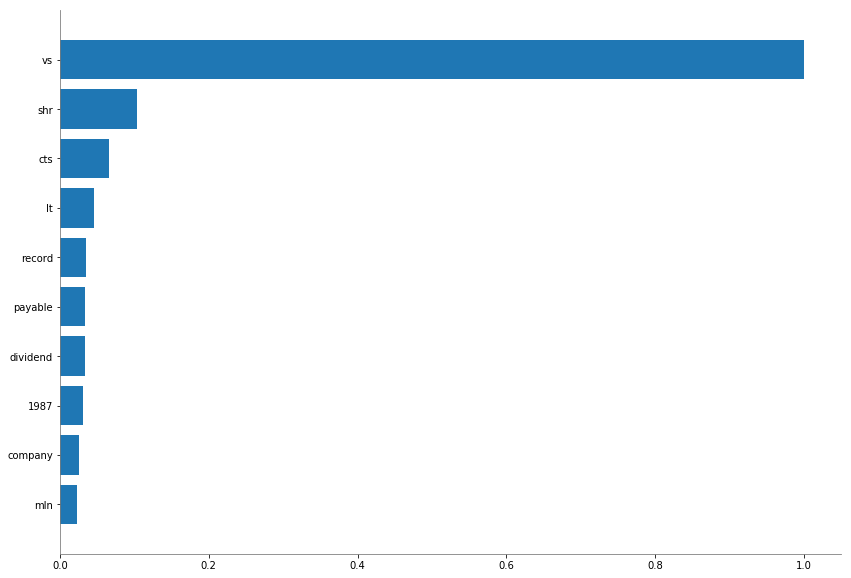

In [8]:
xgbmodel.varimp_plot()

In [86]:
h2o.shutdown()

H2O session _sid_b9dc closed.
